# Programming for Data Science 2024

## Homework Assigment Three

Homework Assigment Three focus in the step-by-step implementation of a simple, yet popular, clustering algorithm, the K-Means. Although in most projects you will source algorithms from libraries such as scikit-learn or Keras, in other cases you will need to implement an algorithm yourself. For instance, if such algorithm is not available or if you want to tailor the algorithm to your problem. In that sense, learning to implement algorithms is an important part of your skillset.

This is an Individual assingment, students that are caught cheating will obtain a score of 0 points.<br>
The Homeworking Assignment Three is worth 10% of your final grade.

The submission package should correspond to a .zip archive (.rar files are not acceptable) with the following files:
1. Jupyter Notebook with the output of all the cells;
2. HTML print of your Jupyter Notebook;
3. All files outputed as part of the exercises.

The .zip archive filename should be student1ID_student2ID.

Your submission will be graded according to the following guidelines:
1. Execution (does your program does what is asked from the exercise?)
2. Objectivity (are you using the adequate libraries?)
3. Readibility of your code (that includes comments, naming of variables, supporting text, etc ...)

In some questions might require that you make critical decisions, or design choices. In such cases, you will be graded according also for your ability to justify and support your decisions.

<b>Comment your code properly, which includes naming your variables in a meaningful manner. Badly documented code will be penalized.</b>

Submission is done through the respective Moodle activity.
Deadline is November 2nd at 12:00. 
A penality of 1 point per day late will be applied to late deliveries, with a maximum of 5 days.

Please fill the following fields: <br> <br>
**Name**: Alexandre Gentil Soares Gonçalves <br>
**ID**: 20240738 <br>

<br> 

**Name**: Rita Santos <br>
**ID**:  20240661 <br>


## Clustering with K-Means

K-Means is one of the most popular "clustering" algorithms, which you perhaps are already familiar from the Data Mining curricular unit. K-means estimates the location of $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

The K-means Algorithm consists in an iterative process that is roughly as follows:
1. Choose value for K (number of clusters);
2. Initialize the locations of the centroids, which we can do by randomly select K points from your dataset as initial locations of the centroids;
3. Calculate distance of all other points to each of the K centroids;
4. Associate each point to the cluster of the closest centroid;
5. Update the centroid position, by computing the average coordinates of all points associated to each cluster;
6. Evaluate the average change in the centroids positions, as a measure of convergence (the algorithm is said to have converged to the solution when the positions of the centroids don't change more than a given tolerance threshold);
7. Repeat steps 3-6 until either the centroids no longer move more than a tolerance threshold or until you repeated these steps at least for specified number of iterations (niter)

The algorithm is thus parametized by the number of clusters (K), the maximum number of iterations (niter), and the tolerance threshold (tol).

### Step 1

Let us start by importing the necessary libraries to execute this homework. <br>
Import numpy, Scipy, and pandas using, respectively, the aliases np, sc, and pd.

In [49]:
import numpy as np
import scipy as sp
import pandas as pd

It is important that we devise a strategy to test our code at each step, in order to assess if it performs as expected. To that end, we have split each step of the algorithm into different blocks, and we ask you to test each block against a simple scenario where the outcome is predictable and can be computed by hand. In some steps, however, we want to pass a more comprehensive dataset with similar properties to the real dataset that we will be working with.<br>

Such, test datasets try to create realistic conditions in which your algorithm is expected to work correctly, and for which we can also assess if the solution matches our expectation. This allows us to have a general understanding if the algorithm performs as expected in "real-world" conditions.<br>

For this homework we will resort to a dataset that contains two clearly distinct clusters. We generated the clusters by sampling points from two distinct gaussian distributions with different averages and same standard deviation. <br>
As such, our algorithm should be able to identify each cluster easily, and place the centroids close to the averages of the two distributions. <br>

Run the cell below to download, load the data into a numpy array, and visualize your Test dataset.<br>
You will run your algorithm implementation against this dataset as a proof of work.

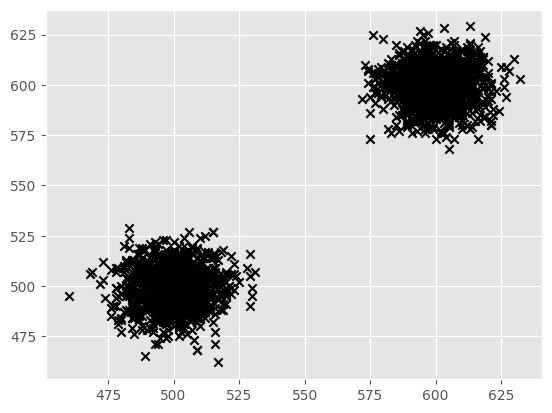

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# download the file into a dataframes and convert it to a numpy array.
data_test = pd.read_csv("https://www.dropbox.com/s/gax1l68jsarxqt9/data_test.txt?dl=1", header=None).to_numpy()

#plot the points into a scatter plot
plt.scatter(data_test[:, 0], data_test[:,1], color ='k', marker='x')

<b>Optional Challenge:</b> Can you write a function that generates an artificial dataset for testing purposes?<br>
We will award one extra point for students that offer a good implementation.

**Consider leaving this challenge to the very end of the assignment**

In [51]:
data_test

array([[502, 505],
       [504, 489],
       [515, 514],
       ...,
       [614, 592],
       [600, 613],
       [610, 580]], dtype=int64)

### Step 2 

Write a function named <b>init</b> that takes two arguments: $points$ and $K$. <br>
The function <b>init</b> should return a numpy ndarray with  $K$ elements sampled randomly and without replacement from $points$. Meaning, the same point cannot picked up twice. <br>

**Show that your function performs as desired by calling it with** $K = 2$ **and use data_test as the** $points$

In [52]:
data_test.shape[0]

2047

In [53]:
def init(points, K):
    # generates a range the size of the data
    # chooses K numbers, without replacement, and stores them in the variable ind
    ind = np.random.choice(points.shape[0], size=K, replace=False)

     # acceses "points" and returns the points in the respective position 
    return points[ind]

In [54]:
init(data_test,2)

array([[586, 599],
       [593, 597]], dtype=int64)

### Step 3

Write a function named <b>distance</b> that takes two arguments: $p1$ and $p2$. <br>
The function <b>distance</b> should return a scalar that corresponds to the euclidean distance between points $p1$ and $p2$, that should have a ndarray format. <br> 
Assume that $p1$ and $p2$ are two ndarrays of the same size.

Recall that the euclidian distance (d) between two points ($p_1$ and $p_2$) in a 2-dimensional space is given by:<br><br>
\begin{equation}
    d(p_1, p_2) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 }
\end{equation}<br>
where $p_1 = \{x_1,y_1\}$ and  $p_2 = \{x_2,y_2\}$. <br>


**1) Test that your function works by computing the distance between p1=(1,3) and p2=(7,2), which is $\approx$ 6.08.**<br>
**Consider using the existing Numpy or Scipy packages for this task.**

Can you write a function that computes the euclidean distance between two points of arbitrary dimension? <br>
In general, for arbitrary dimensionality the square of the distance can be computed as:<br><br>
\begin{equation}
    d^2(p_1, p_2) = \sum_{i=0}^{D-1} (x_i-y_i)^2
\end{equation}<br>
where $p_1 = \{x_1,x_2,...,x_{D-1}, x_D\}$ and $p_2 = \{y_1,y_2,...,y_{D-1},y_D\}$.<br>

**2) Show that your function works by computing the distance between (1,3,-9,12) and (7,2,0,5)**

***1)***

In [55]:
def distance(p1,p2):
    # Check if the points have the same number of dimensions
    if len(p1) != len(p2): # If the dimensions of the points are different then raise a ValueError
        raise ValueError ("The dimensions of the points are not the same")
    else:
        distance = 0
        for i in range(0,len(p1)): # Loop trough the dimensions of the points (because they have the same dimension)
            distance += (p1[i] - p2[i])**2 # Compute the distance between each coordinate(i equals the number of dimensions)
    return np.sqrt(distance) # Return the square root of distance


In [56]:
#Test variables, do not change the values
p1 = np.array([1,3])
p2 = np.array([7,2])

distance(p1,p2)

print(f"The distance function outputs the value expected which is {distance(p1,p2)}.")


The distance function outputs the value expected which is 6.082762530298219.


***2)***

In [57]:
#Test variables, do not change the values
p1 = np.array([1,3,-9,12])
p2 = np.array([7,2,0,5])

distance(p1,p2)

12.922847983320086

### Step 4

Write a function <b>centroid_update</b> that takes two input arguments: <i>points</i> and <i>clusters</i><br> 
The argument <i>points</i> is a ndarray containing the coordinates of a set of points (1 point per row).
The argument <i>clusters</i> is a 1-dimensional ndarray that indicates the cluster to which each point is associated.
Note that values in <i>clusters</i> are integers and can only take values between 0 and K-1, where K is the number of clusters.

The function <b>centroid_update</b> should return an ndarray with the average coordinates of the points associated to each cluster, that is the centroid of each cluster. The returned array should have the same number of columns as points and length K.

**Test your function and report the centroids generated by passing p and c as inputs with k = 3. Save these centroids as a variable: cen**

In [58]:
def centroid_update(points, clusters):
    # Determine the number of clusters
    K = len(np.unique(clusters))  # unique clusters give the K unique clusters that are passed as an input
    
    # Initialize an empty list to store the coordinates of each centroid
    centroids = []

    # Loop trough the range of clusters because each cluster will have a centroid , and thus a coordinate for that centroid
    for cluster_id in range(K): 
        
        # Select from the points array the points where the cluster label equals the cluster_id, and store it in another array
        cluster_points = points[clusters == cluster_id]  

        # Calculate the mean of the coordinates for the the several points inside the cluster points array which are splited by cluster 
        # The result will be a centroid coordinate for each subset of the cluster_points
        centroid = cluster_points.mean(axis=0) 
        
        # Piece of code to verify which points belong to which cluster (no need to run it, it was just a test)
        # if cluster_id == 1:
            #print(f"Points in cluster {cluster_id}:")
            # print(cluster_points)
        
        # Append the centroid coordinate for a particular cluster to the centroids list
        centroids.append(centroid) # If we have f.example 3 points in centroid, we will compute the avg of 3 x coordinates and the avg of 3 y coordinates and append those to the
                                   # centroids list

    # Convert centroids list to ndarray
    return np.array(centroids)

In [59]:
# Test variables, do not change the values
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
c = np.array([2, 0, 0, 1, 1, 0, 0, 1, 0, 1])

cen = centroid_update(p,c) 

print(cen) # The output is as expected, as we have 3 points and 3 columns (the 1st column represents x coordinates and the 2nd column represents y coordinates)
           # We have 3 means (points) because we have 3 unique clusters (0,1,2)

[[0.44995487 0.55986467]
 [0.53760985 0.53912646]
 [0.8922063  0.26672425]]


### Step 5

Write a function <b>points_update</b> that takes two input arguments: $points$ and $centroids$.<br>
The function <b>points_update</b> should return a one-dimensiona ndarray that indicates the index of the centroid that is closer to each point. To determine the distance between a centroid and a point you can use your distance function you created earlier. <br>

You will need to assess the distance between each point to each centroid. Different approaches can be taken to do this. For instance, you can start by computing a d by k distance matrix matrix between each of the $d$ points and the $k$ centroids.

**Test your function by calling it and passing the array p (as defined above) with the output of cupdate, cen, as arguments. You should get an output that looks like c defined above (but is not exactly the same, can you see why). Print this result and save it in a variable called new_clusters**

In [60]:
def points_update(points,centroids):
    
    # Initialize a list to store the assigned cluster
    centroid_index = []

    # Loop through each point of points array
    for point in points:
        # Calculate the distances from the 'point' to all 'centroids' and store in an array (distances is an array where each element represents the distance from the point to a 
        # different centroid)
        distances = np.array([distance(point,centroid) for centroid in centroids])
        
        # np argmin finds the index of the smallest value in distances, which corresponds to the closest centroid
        closest_centroid = int(np.argmin(distances))
        
        # Append the index of the closest centroid to the 'centroid_index' list
        centroid_index.append(closest_centroid) 
    
    return np.array(centroid_index)  # Return 1D array that indicates the index of the centroid that is closer to each point (each position of that array represents a point)


In [61]:
# Test points_update function

# Calling points_update with input array  p and centroids = cen. 
new_clusters = points_update(p,cen)

In [62]:
new_clusters

array([2, 0, 0, 1, 2, 0, 1, 1, 0, 0])

In [63]:
c

array([2, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [64]:
# Explanation on why the position 4 of c and new_clusters are different

# The array c was initially provided as an input, representing clusters that were assigned without using calculated centroids (probably set arbitrarily or by a 
# previous iteration that didn't consider updated centroids)


# After running centroid_update , we've calculated new centroids based on the actual mean positions of the points in each cluster
# Then, in points_update we've reassigned each point to each respective cluster based on the shortest Euclidean distance to these updated centroids
# The change in position 4 , occurs because the point in points position 4 is closer to centroid 2 than it is to centroid 1 (that was previously set)


### Step 6

Write a function <b>error</b> that takes two input arguments: oldcentroids and newcentroids.<br>
The argument oldcentroids corresponds to a ndarray with centroid positions from the previous iteration, and newcentroids to a ndarray with the newly computed centroid positions from the current iteration. <br>

The function <b>error</b> should return the average euclidean distance between the old and new positions of each centroid. This will give us a quantity that tell us whether our algorithm is still converging to the solution or got to good approximation. We will use a tolerance threshold in the average change in the centroids positions to make this decision.

**Test your function then report the distance between the centroids calculated in Step 5, cen, and the centroids that you can calculate using the function cupdate with the arguments points and new_clusters.**

In [65]:
def error(oldcentroids, newcentroids):
    #creates a list to store the distances between the old centroids and the new ones
    dist = []
    #iterates through the two arrays
    for i in range(len(oldcentroids)):
        dist.append(distance(oldcentroids[i], newcentroids[i])) #calculates the distance between the old and new position of each centroid and adds it to the list
    
    #calculates the average of the distances 
    avg_dist = sum(dist)/len(dist)
    return avg_dist

In [66]:
# Test function

# Calculate the new centroids based on the updated cluster assignments

new_centroids = centroid_update(p,new_clusters)


# Return the average euclidean distance between the old and new positions of each centroid 

error(cen,new_centroids)

0.17635560837965428

### Step 7

Write a wrapper function called <b>kmeans</b> that takes the following arguments:
- $points$, which is a ndarray of points;
- $K$, the number of clusters, set the default value to two;
- $niter$, the number of iterations;
- $tol$, the error tolerance threshold below which your algorithm should stop

The function should return:
- A one dimensional ndarray with the cluster of associated to each point,
- A ndarray with the location of the K centroids.

Use the functions you prepared in the previous Steps to assemble the function <b>kmeans</b>. <br>
Use the tolerance as a treshold to stop the algorithm, for instance by evaluating if the average variation in the distance between the new and previous coordinates of the centroids is below the tolerance level. If yes, then you can stop the algorithm and return the outputs. <br>

You will need to make some decisions about the best approach to select the correct range of values to pass to init(). Explain how you did it.

**Note: A common issue with the K-means algorithm is that in some limiting conditions it might lead to empty clusters. In that case it is expected that your algorithm to return errors. Although that is not expected to happen with the examples provided, you might want to consider implementing some heuristics to overcome those errors. However, such is an optional task, and for this homework if you bump into such errors we recommend you try to rerun your code.**

In [67]:
def kmeans(points,K,niter,tol):
        
    # Find centroids with init(points, K) to pick K random points as initial centroids.

    centroids = init(points,K)

    for i in range(niter):
        # Assign points to the closest centroids
        clusters = points_update(points, centroids)

        # Update centroids using centroid_update function
        new_centroids = centroid_update(points, clusters)

        # Check if the change in centroids is within the tolerance

        if error(centroids, new_centroids) < tol:
            break  # Convergence achieved, exit the loop
        
        # Update centroids for the next iteration
    
        centroids = new_centroids

    return clusters, centroids # return 1D array w/ a label for each point that represents the cluster associated to that point and the coordinates of the K centroids


In [68]:
kmeans(data_test,2,500,0.00001)

(array([0, 0, 0, ..., 1, 1, 1]),
 array([[499.65527344, 498.94433594],
        [599.49853372, 599.63538612]]))

It is useful to visually inspect the results in order to assess the performance of the clustering algorthim. <br>
Below is an example of how you can visualize your results for a sample dataset. <br>
Can you adapt the code to show your results applied to data_test with K = 2, niter = 500, tol = 0.00001.

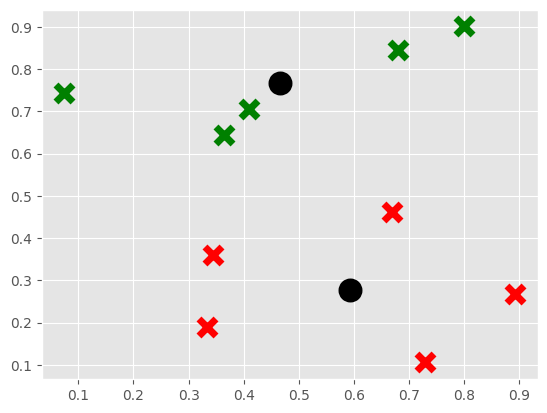

In [69]:
#boilerplate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# let us define the style of the plot here
style.use('ggplot')
colors = ["g","r","c","b"]

# sample data for this example
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
centroids = [np.array([0.46519213, 0.76779111]),np.array([0.59329188, 0.27671958])]
clusters = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# plot each point in the centroids array
for centroid in centroids:
    plt.scatter(centroid[0],centroid[1], marker="o", color="k", s=150, linewidths=5)

# plot each point in the points array, colored according to the cluster they belong
for i in range(len(clusters)):
    plt.scatter(p[i,0],p[i,1], marker="x", color=colors[clusters[i]], s=150, linewidths=5) # p[i,0] is the x-coordinate ; p[i,1] is the y-coordinate
                                                                                           # clusters[i] will give the color , if clusters[i] == 0 then color[0] = green meaning that every point that belongs to cluster 0 will be green
                                                                                           # if clusters[i] == 1 then color[1] == red , then every point from cluster 1 will be red
# plot all elements
plt.show()

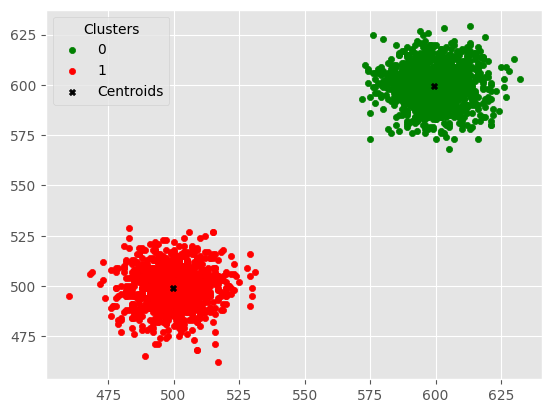

In [70]:
# Define clusters & centroids based on data from 'kmeans' function and data_test
clusters, centroids = kmeans(data_test, K=2, niter=500, tol=0.00001)

# Define custom colors for each cluster
custom_colors = {0: 'green', 1: 'red'}

# Plot each point in the data_test array, colored according to the cluster they belong to
for cluster in custom_colors:
    cluster_points = data_test[clusters == cluster]  # Select points belonging to this cluster
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=custom_colors[cluster], s=20, label=str(cluster))

# Plot centroids with a distinct marker and color
plt.scatter(centroids[:, 0], centroids[:, 1], color="black", marker="X", s=20, label="Centroids")

# Add legend and show the plot
plt.legend(title="Clusters")
plt.show()

### Step 8

Write a function <b>inertia</b> that takes three input arguments: $points$, $clusters$, and $centroids$.<br>
Where $points$ is an 2-dimensional ndarray with the coordinates of each point in your dataset, clusters is a vector that indicates the cluster of each point (takes values between $0$ and $K-1$), and $centroids$ is a 2-dimensional ndarray with length $k$ of the coordinates of the centroids.

The function should return a tuple in which the first value is the number of clusters and the second is the computed **average squared distance** of the points to the centroid of the cluster they are assigned.

**Test your function and report the results of using point=p, clusters=c, and centroids=cen. These are the quantities that you computed above in the different steps**

In [71]:
def inertia(points,clusters,centroids):
    
    # Number of unique clusters
    K = len(np.unique(clusters)) 

    # Store the total squared distance
    total_squared_distance  = 0  

    for k in range(K):
        # Select points assigned to the current cluster
        cluster_points = points[k == clusters]

        # Calculate the squared distance of each point to the centroid of its cluster
        for point in cluster_points:
            # 'centroids[k]' retrieves the coordinates of the centroid for cluster 'k'
            # Here, we compute the squared distance between each point in the cluster
            # and its corresponding centroid, then add it to the total_squared_distance
            total_squared_distance += (distance(point,centroids[k]))**2  

    # Calculate average squared distance by dividing by the total number of points
    avg_squared_distance = total_squared_distance / len(points)

    return K, avg_squared_distance
    

In [72]:
inertia(p,c,cen)

(3, 0.10954209828084611)

### Step 9

Load the data from file https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1 into numpy array.<br>
The data consists of the coordinates of $N$ points in a 2-dimensional space. <br>
Use the functions <b>kmeans</b> and <b>internia</b> to identify the most suitable number of clusters. <br>
You might want to consider doing some visual inspection and reporting. <br>
For instance, inspect visually the dataset before performing the clustering; report the inertia values as a line plot; show the result of your clustering.

Tip: use the output of inertia to perform the elbow method https://en.wikipedia.org/wiki/Elbow_method_(clustering).

<img src="images/example_plot.png" alt="Alt text" width="700"/>

In [73]:
# download the file into a dataframes and convert it to a numpy array.
data_clustering = pd.read_csv("https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1", header=None).to_numpy()

In [74]:
data_clustering

array([[664159, 550946],
       [665845, 557965],
       [597173, 575538],
       ...,
       [650661, 861267],
       [599647, 858702],
       [684091, 842566]], dtype=int64)

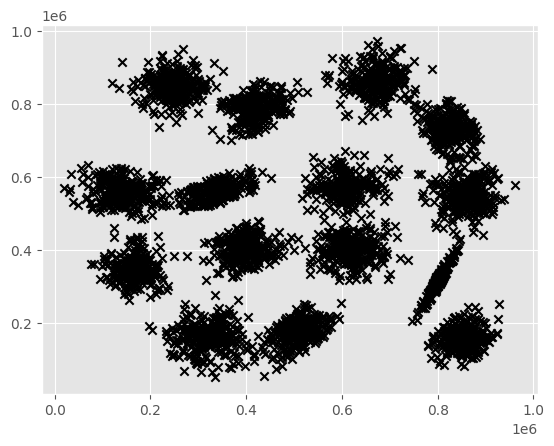

In [75]:
#plot the points into a scatter plot
plt.scatter(data_clustering[:, 0], data_clustering[:,1], color ='k', marker='x')

In [76]:
def elbow_method(data,K,niter,tol): 
    # Initialize an empty list to store the Within-Cluster Sum of Squares (WCSS) for each number of clusters
    wcss = [] 

     # Loop through each number of clusters from 1 up to K (the maximum number of clusters we're testing)
    for i in range(1,K+1):
        
        # Run the K-means algorithm with 'i' clusters, 'niter' iterations, and tolerance 'tol'
        kmeans_output = kmeans(data,i,niter,tol) 
        
        # 'kmeans_output[0]' is the cluster assignments
        # 'kmeans_output[1]' is the centroids coordinates
        # We're only interested in the second value returned by the inertia function (the WCSS) , thus as inertia returns K, avg_sqr_dist we're only interest in the inertia[1] -> avg_squar_dist
        wcss_iter = inertia(data,kmeans_output[0],kmeans_output[1])[1] 
        
        # Append the WCSS for this number of clusters to the wcss list
        wcss.append(wcss_iter) 

    # Now that we have the WCSS values for each number of clusters (each value of wcss is the WCSS for respective cluster i to K+1), we can plot them
    number_of_clusters = range(1, K+1)
    
    plt.plot(number_of_clusters, wcss, marker='o', linestyle='-', color='black')
    plt.title('The Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
    plt.show()


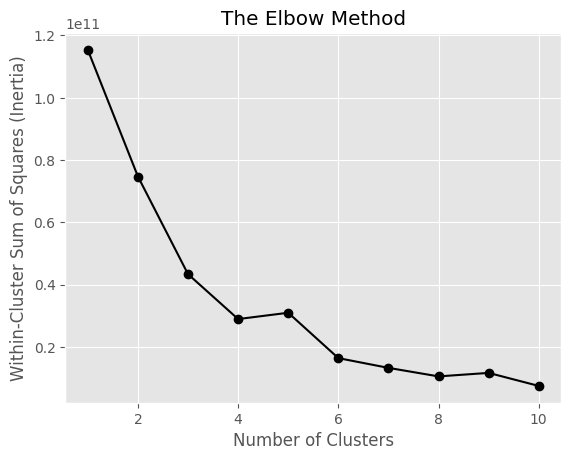

In [77]:
elbow_method(data_clustering,10,500,0.0001)

Answer: The inertia plot shows a sharp decrease in WCSS up to 4 clusters, after which the reduction slows, indicating diminishing returns. This plot suggests that 4 clusters offer a good number of clusters without over-complicating the model.

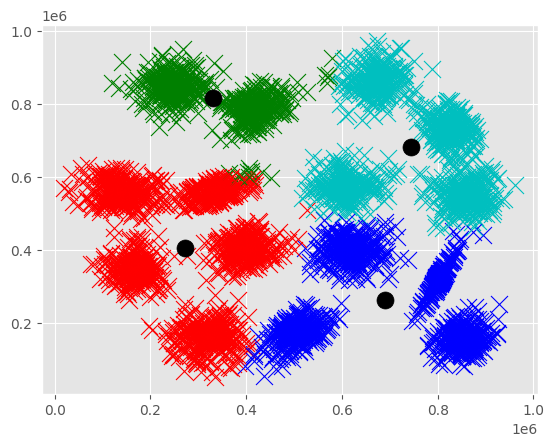

In [81]:
# Define the plot style and colors
style.use('ggplot')
colors = ["g","r","c","b"]


# K-means parameters
K = 4
niter = 500
tol = 0.0001

# Assign the dataset we want to cluster to a variable 
p = data_clustering

# Run the K-means algorithm on the dataset 'p'
# 'centroids' will store the coordinates of the final cluster centers
centroids = kmeans(p,K,niter,tol)[1] # [1] to store the result of kmeans function w/ position 1 which is centroids
clusters = kmeans(p, K, niter, tol)[0] # [0] to store the result of kmeans function w/ position 0 which is clusters

# Plot each data point in the subset, colored by cluster
for i in range(len(clusters)):
    # Plot the data point at coordinates (p[i, 0], p[i, 1]) w/ marker "x" to distinguish from centroids, and colors determined by the cluster index stored in clusters[i]
    plt.scatter(p[i, 0], p[i, 1], marker="x", color=colors[clusters[i]], s=150, linewidths=0.8)

#  Loop through each centroid in the centroids array
for centroid in centroids:
    # Plot centroid at coordinates (p[i, 0], p[i, 1]) w/ color black and marker "o"
    plt.scatter(centroid[0], centroid[1], marker="o", color="k", s=150, linewidths=0.5)


# Final display
plt.show()


<b>Optional Challenge:</b> Can you write a function that generates an artificial dataset for testing purposes?<br>
We will award one extra point for students that offer a good implementation.

**Consider leaving this challenge to the very end of the assignment**

In [79]:
def syntethic_generator(nr_features,K,points_per_cluster,variance,min,max):
    np.random.seed(102)  # Ensure reproducibility

    # Create an empty list to store centroid coordinates 
    centroid_center_coordinates = []

     # Generate random coordinates for the centroids of K clusters
    for point in range(K): 
        # Temporary list to store the coordinates of a centroid
        single_point = [] 
        # Generate coordinates for each feature
        for idx_coordinate in range(nr_features): 
            # Pick a random integer between 'min' and 'max' for each coordinate
            single_point.append(np.random.randint(min, max)) 
        # Convert the list of coordinates to a tuple and add it to the list of centroid coordinates
        centroid_center_coordinates.append(tuple(single_point)) 


   # Now we generate points around each centroid and assign them labels
    points_list = []
    labels = []
    
    # 'cluster_id' is the unique ID for each cluster (e.g., 0, 1, 2, ...)
    # 'centroid' is the coordinate of the current cluster's center
    # enumerate holds a cluster id for each coordinate of the centroid
    for cluster_id, centroid in enumerate(centroid_center_coordinates):
        # Iterate the number of points per cluster times, because we want that number of points around each cluster
        for i in range(points_per_cluster):
            # For each point to be generated in the cluster, create a point near the centroid
             # Use a normal distribution centered around each coordinate of the centroid (loc=coord)
            # The spread of points around the centroid is controlled by 'variance' (scale=variance)
            single_point = [
                np.random.normal(loc=coord, scale=variance) for coord in centroid
            ]
            
            # Convert the list of coordinates for this point to a tuple and add it to 'points_list' (This tuple represents the coordinates of a point that belongs to the current cluster)
            points_list.append(tuple(single_point)) 
            
            # Add the current cluster ID to 'labels' so that each point has a corresponding label
            labels.append(cluster_id) 

    # After generating all points for each cluster, return the generated points,
    # the centroid coordinates, and the labels for each point
    return points_list, centroid_center_coordinates, labels


In [80]:
# Example usage
points, centroids , labels = syntethic_generator(nr_features=2, points_per_cluster=5, variance=2, min=0, max=100, K=2)
print("Points:", points)
print("Centroids:", centroids)
print("Labels:" , labels)

Points: [(0.22306759874335458, 75.42102812327151), (-0.1347585266380851, 74.78686267904841), (0.09120508775872245, 74.39601354350513), (-1.2202675692968807, 78.13029393611978), (0.6921976262066043, 78.84179677452664), (62.975427617958644, 70.45639986657878), (67.28732167832013, 71.8650075921955), (65.5725963027581, 74.27043279098285), (63.99579827011269, 72.26625000963688), (64.18152388224664, 72.92031006869483)]
Centroids: [(0, 78), (66, 73)]
Labels: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
